In [14]:
import sys
!{sys.executable} -m pip install --upgrade pip
!{sys.executable} -m  pip install numpy pandas matplotlib seaborn scikit-learn --quiet

# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [15]:
df_creditcard = pd.read_csv('C:/Users/Laptop/OneDrive/Desktop/ali abdullah/project/creditcard.csv')


In [16]:
df_creditcard.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Summary Statistics:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000



Median Values:


Time      84692.000000
V1            0.018109
V2            0.065486
V3            0.179846
V4           -0.019847
V5           -0.054336
V6           -0.274187
V7            0.040103
V8            0.022358
V9           -0.051429
V10          -0.092917
V11          -0.032757
V12           0.140033
V13          -0.013568
V14           0.050601
V15           0.048072
V16           0.066413
V17          -0.065676
V18          -0.003636
V19           0.003735
V20          -0.062481
V21          -0.029450
V22           0.006782
V23          -0.011193
V24           0.040976
V25           0.016594
V26          -0.052139
V27           0.001342
V28           0.011244
Amount       22.000000
Class         0.000000
dtype: float64


Data Types:


Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


Unique Value Counts:


Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64


Missing Values:


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

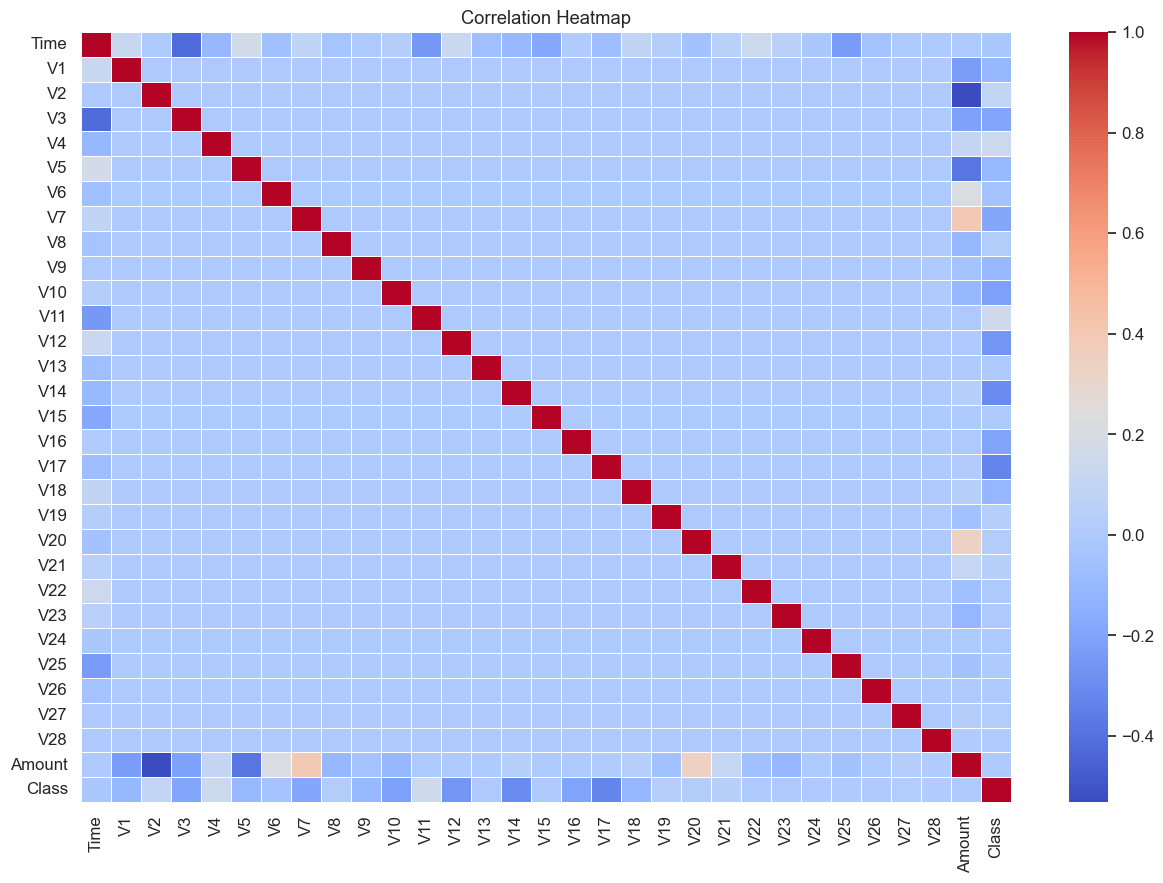

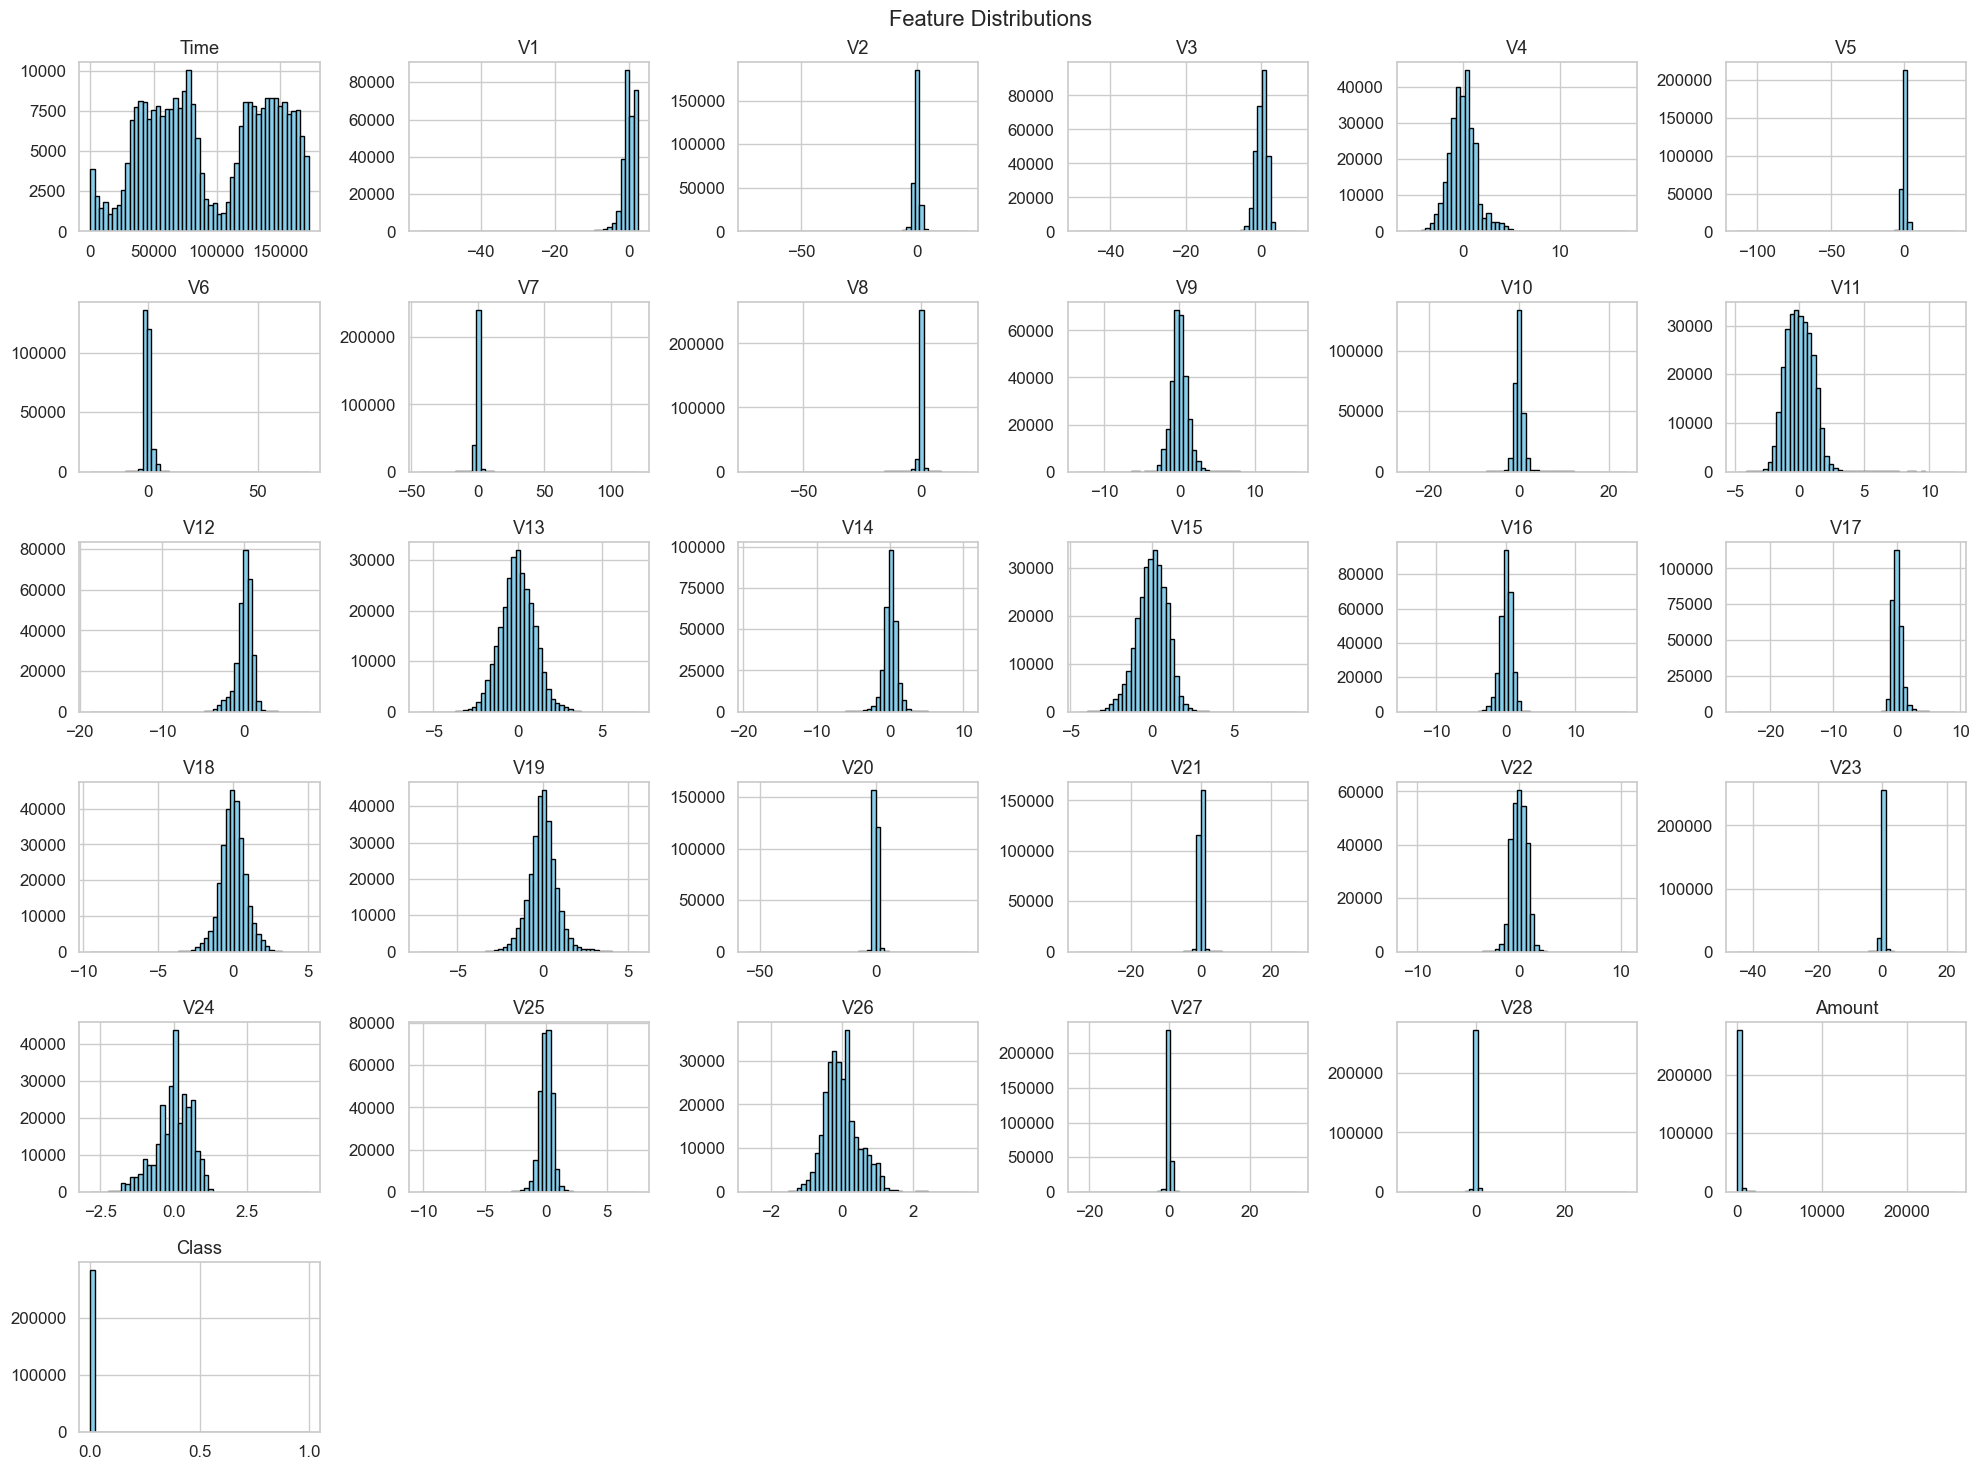

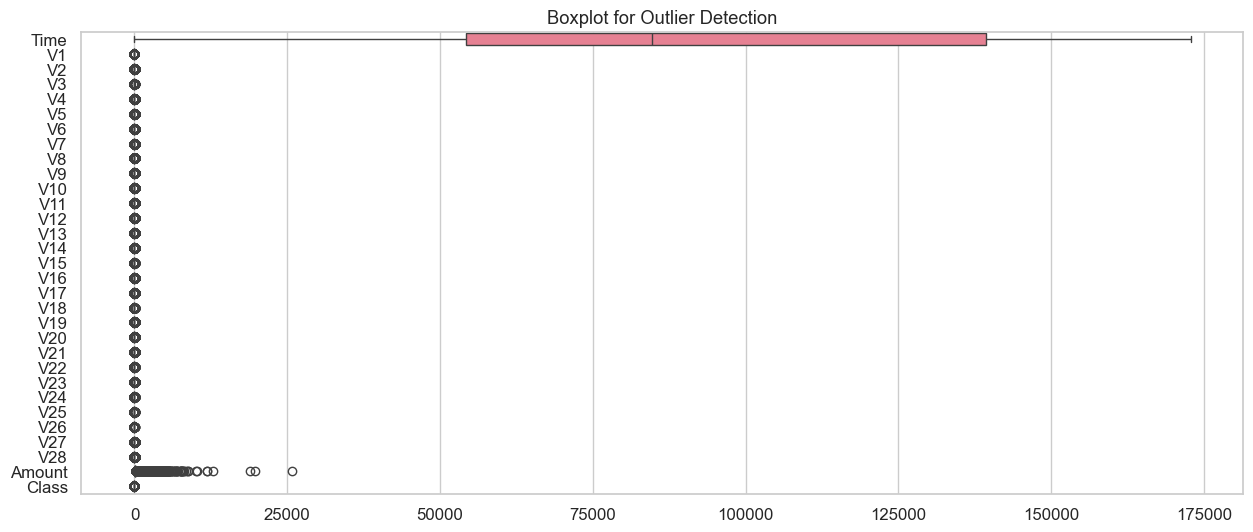

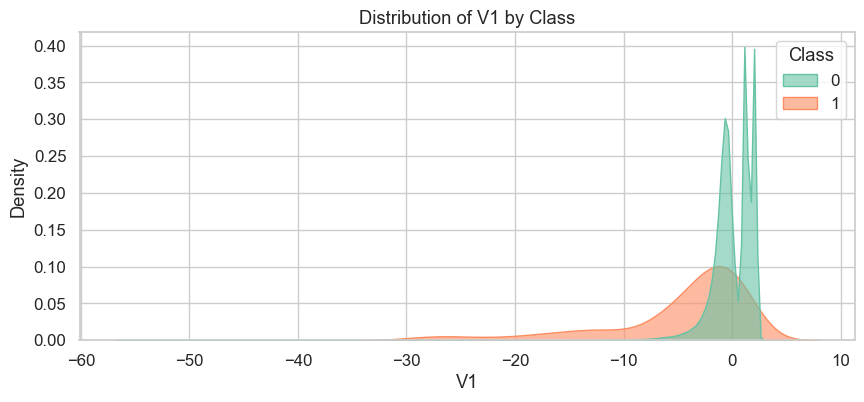

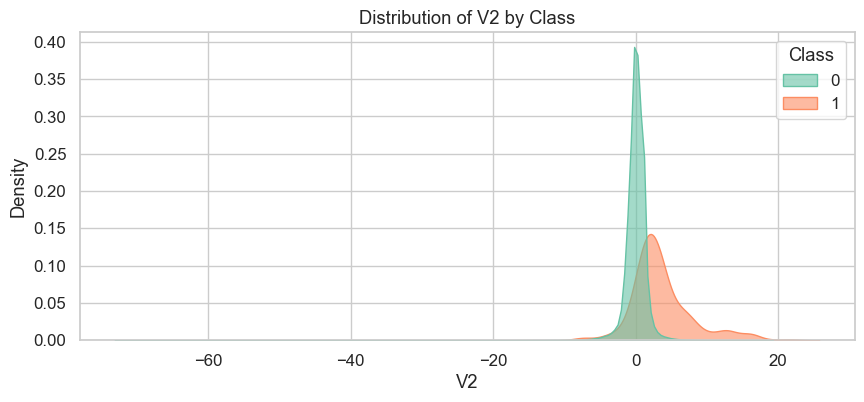

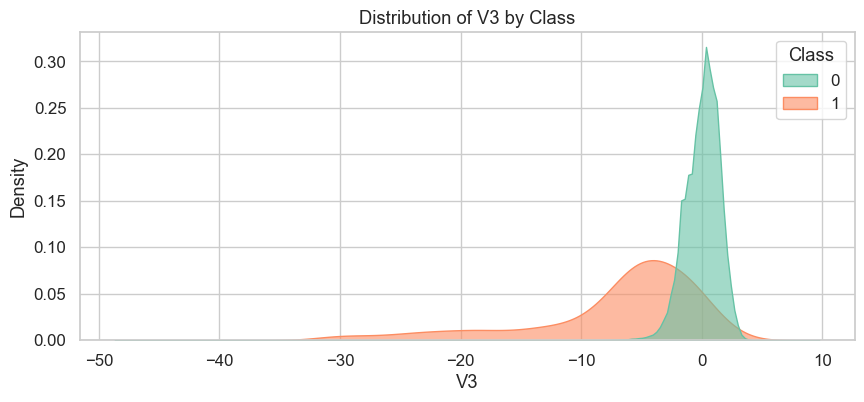

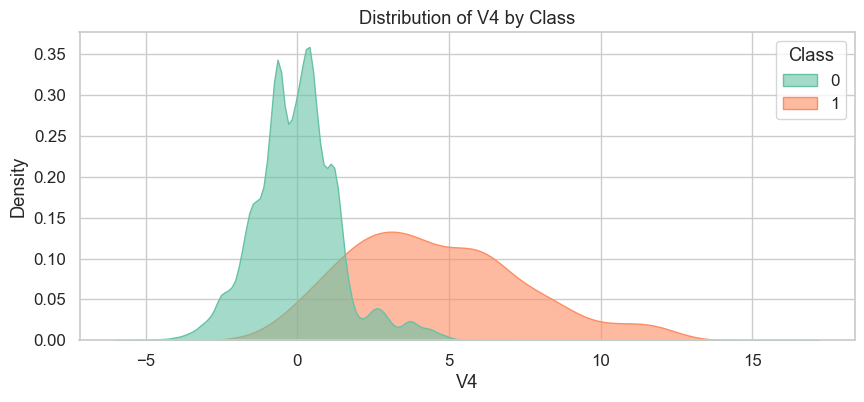

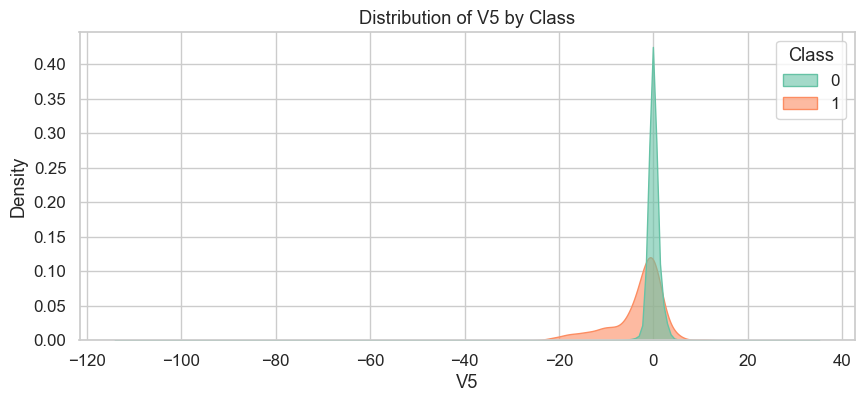

<Axes: xlabel='Time', ylabel='Amount'>

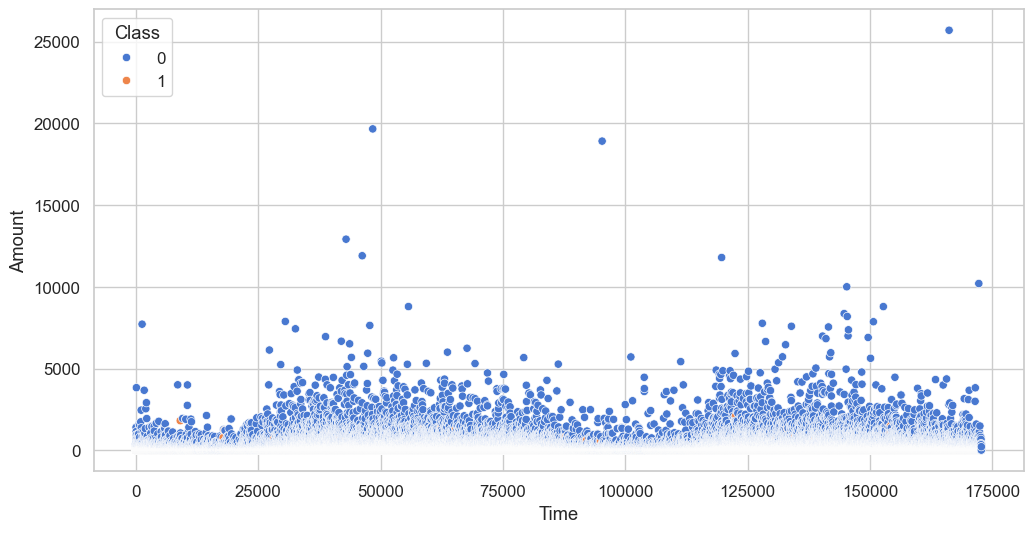

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler

sns.set(style="whitegrid", palette="muted", font_scale=1.1)
plt.rcParams['figure.figsize'] = (12, 6)

df = df_creditcard.copy()

print("Summary Statistics:")
display(df.describe())

print("\nMedian Values:")
display(df.median(numeric_only=True))

print("\nData Types:")
display(df.dtypes)

print("\nUnique Value Counts:")
display(df.nunique())

print("\nMissing Values:")
display(df.isnull().sum())

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

df.hist(bins=50, figsize=(20, 15), color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions")
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 6))
sns.boxplot(data=df.select_dtypes(include=[np.number]), orient="h")
plt.title("Boxplot for Outlier Detection")
plt.show()

features = ['V1', 'V2', 'V3', 'V4', 'V5']
for col in features:
    plt.figure(figsize=(10, 4))
    sns.kdeplot(data=df, x=col, hue='Class', fill=True, common_norm=False, palette='Set2', alpha=0.6)
    plt.title(f"Distribution of {col} by Class")
    plt.show()

sns.scatterplot(data=df, x='Time', y='Amount', hue='Class',)




In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = df_creditcard.copy()

missing = df.isnull().sum()
missing = missing[missing > 0]

if not missing.empty:
    df = df.dropna()
    print("Missing values found and removed.")
else:
    print("No missing values detected.")

categorical_cols = df.select_dtypes(include='object').columns

if len(categorical_cols) > 0:
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
    print(f"Categorical columns encoded: {list(categorical_cols)}")
else:
    print("No categorical variables found.")

scaler = StandardScaler()
df['Amount_Scaled'] = scaler.fit_transform(df[['Amount']])
df['Time_Scaled'] = scaler.fit_transform(df[['Time']])
df.drop(['Amount', 'Time'], axis=1, inplace=True)

X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Data split into training and test sets:")
print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")
print(f"Final feature count: {X_train.shape[1]}")


No missing values detected.
No categorical variables found.
Data split into training and test sets:
Training samples: 227845, Testing samples: 56962
Final feature count: 30


In [19]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import joblib

model = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")

joblib.dump(model, "rf_model.joblib")
joblib.dump(scaler, "scaler.joblib")

print("Model and scaler saved successfully for Streamlit runtime use.")


Confusion Matrix:
[[56861     3]
 [   24    74]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.76      0.85        98

    accuracy                           1.00     56962
   macro avg       0.98      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy: 0.9995
F1 Score: 0.8457
Model and scaler saved successfully for Streamlit runtime use.


In [20]:
import functools
@functools.lru_cache(maxsize=1)
def load_data():
    df = pd.read_csv("C:/Users/Laptop/OneDrive/Desktop/ali abdullah/project/creditcard.csv")
    columns_to_drop = ['Amount', 'Time']
    existing_cols = [col for col in columns_to_drop if col in df.columns]
    df = df.drop(existing_cols, axis=1)
    return df

In [21]:
print(df.columns)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class',
       'Amount_Scaled', 'Time_Scaled'],
      dtype='object')


In [27]:
import streamlit as st
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score



Missing Values:
Class Distribution:
Class
0    284315
1       492
Name: count, dtype: int64

Percentage of Fraudulent Transactions:
0.17%


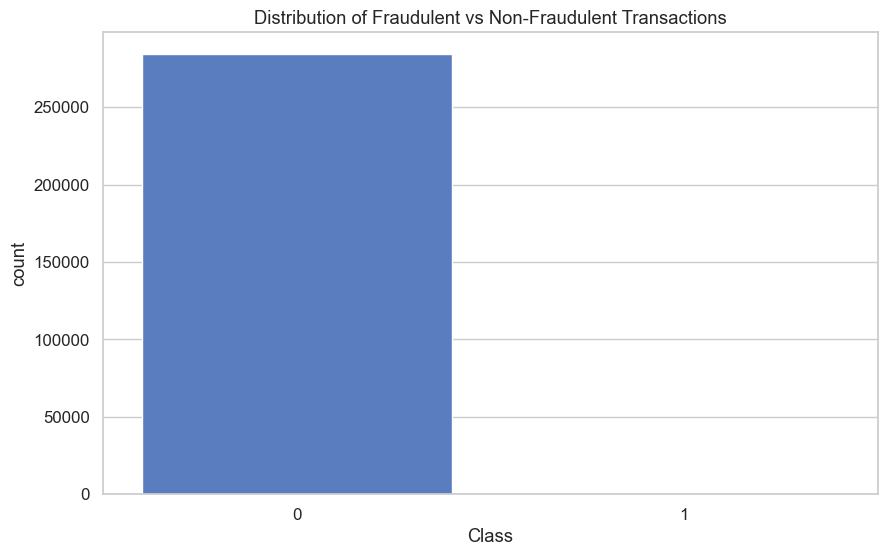

In [23]:
# Check for missing values
print("Missing Values:")
df.isnull().sum()

# Class distribution
print("Class Distribution:")
print(df['Class'].value_counts())
print("\nPercentage of Fraudulent Transactions:")
print(f"{df['Class'].mean()*100:.2f}%")

# Visualize class distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Class')
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
plt.show()

Training Random Forest model...
Making predictions...

Model Performance:
Accuracy: 0.9995962220427653

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.82      0.87        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962



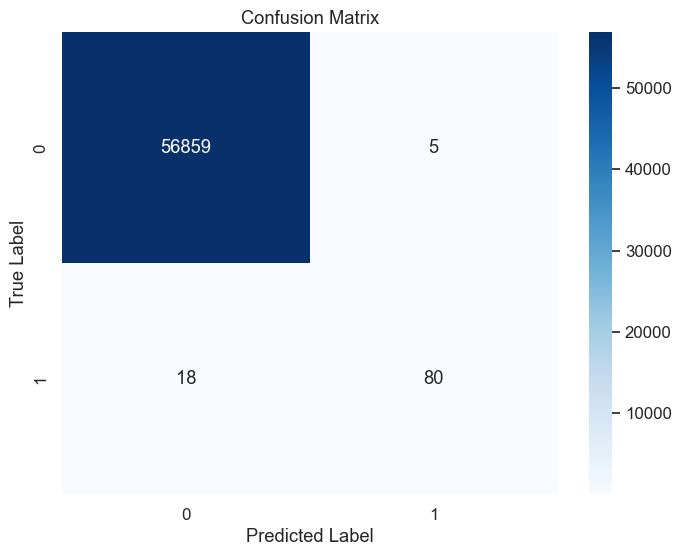

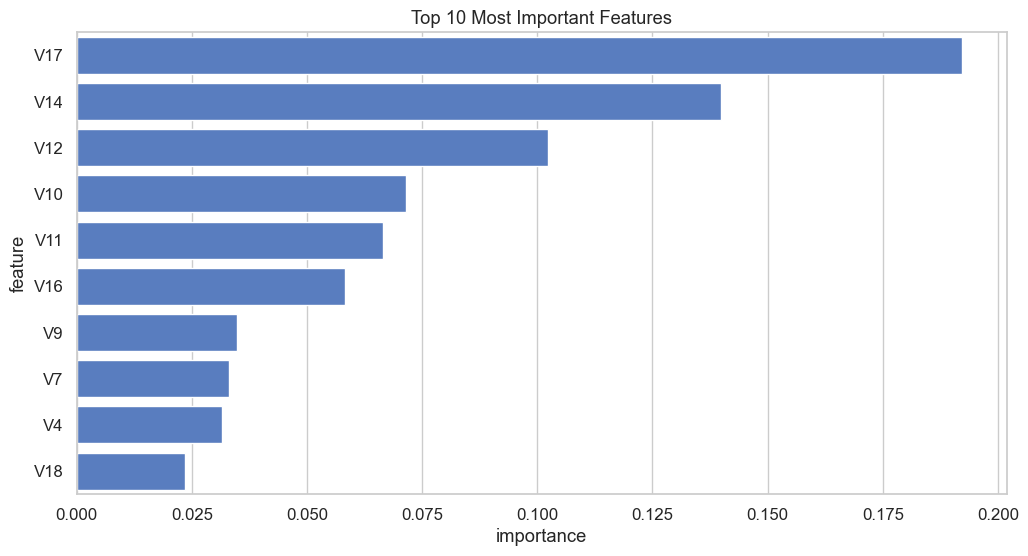


Saving model and scaler...
Model and scaler saved successfully!


In [28]:
# Prepare data for modeling
X = df.drop('Class', axis=1)
y = df['Class']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest model
print("Training Random Forest model...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
print("Making predictions...")
y_pred = rf_model.predict(X_test_scaled)

# Print metrics
print("\nModel Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
plt.title('Top 10 Most Important Features')
plt.show()

# Save the model and scaler
print("\nSaving model and scaler...")
joblib.dump(rf_model, 'rf_model.joblib')
joblib.dump(scaler, 'scaler.joblib')
print("Model and scaler saved successfully!")

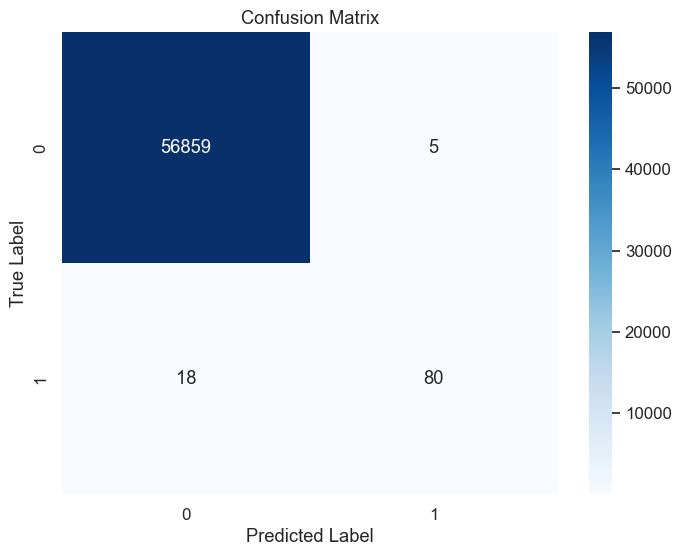

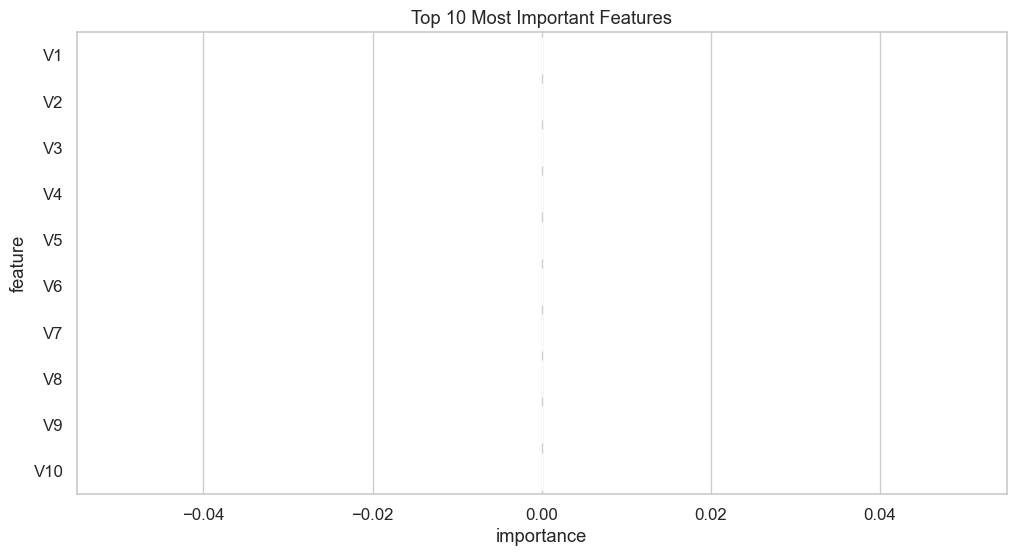

Model and scaler saved successfully!


In [30]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
plt.title('Top 10 Most Important Features')
plt.show()

# Save the model and scaler
joblib.dump(rf_model, 'rf_model.joblib')
joblib.dump(scaler, 'scaler.joblib')
print("Model and scaler saved successfully!")

Available columns in the dataset:
['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class', 'Amount_Scaled', 'Time_Scaled']


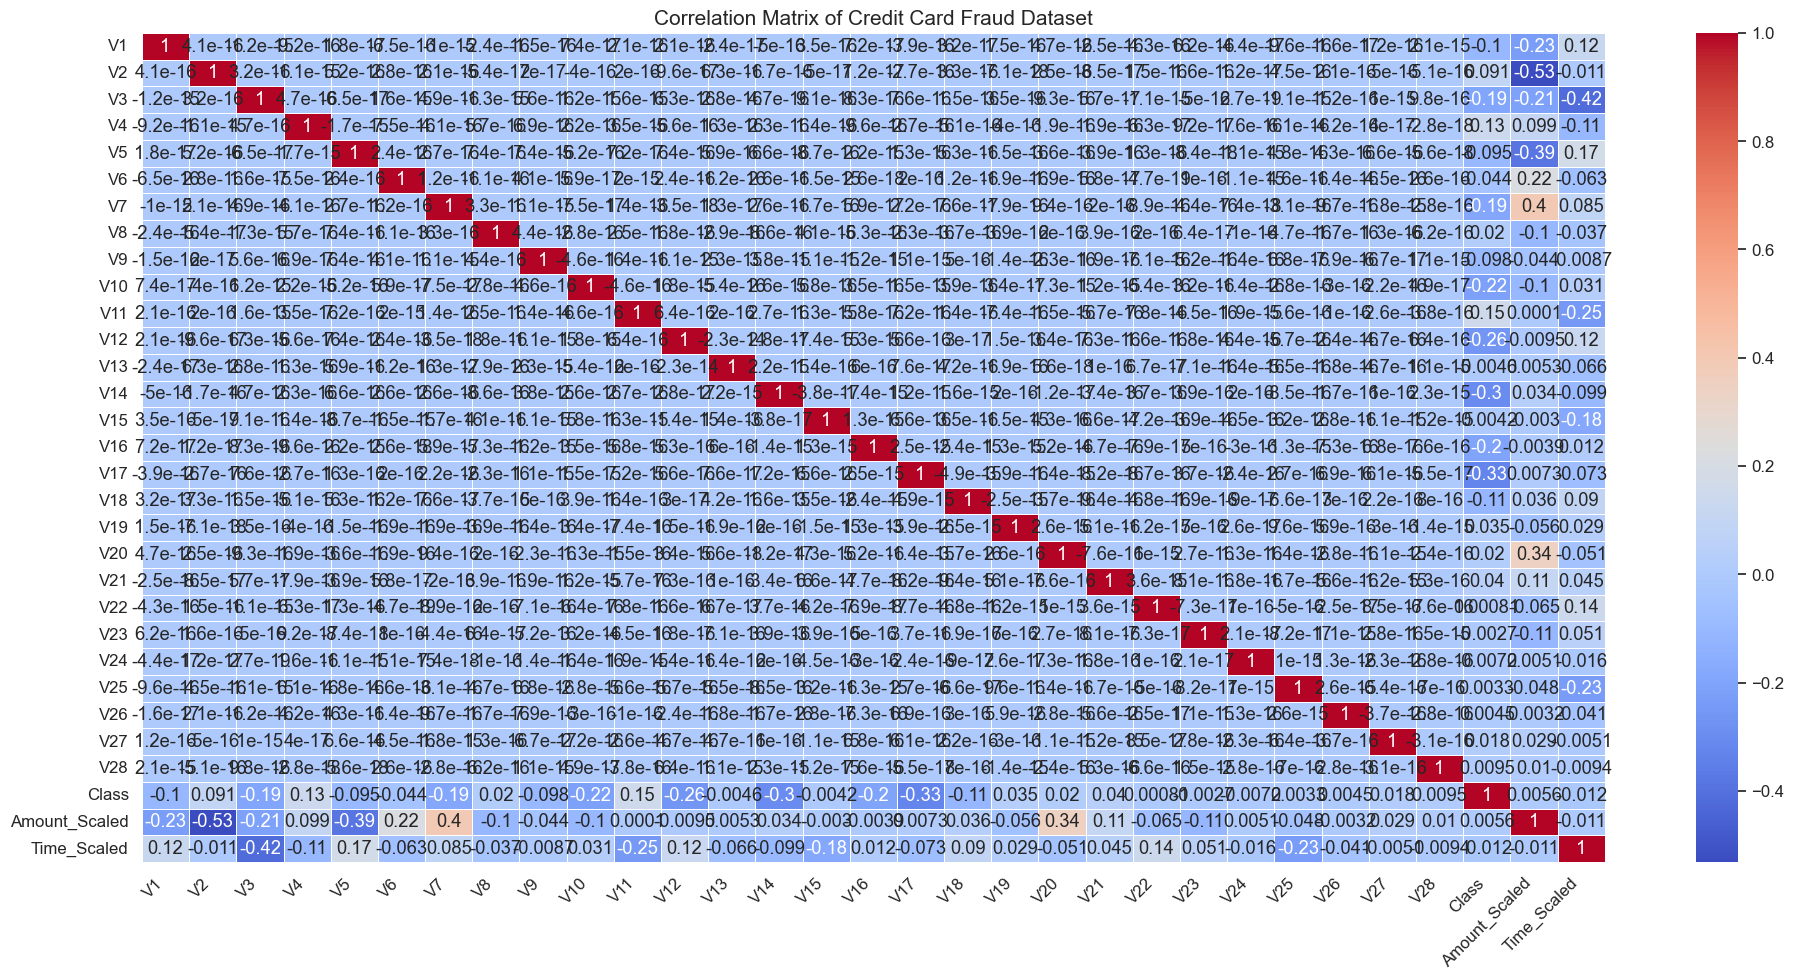


Top 10 Features Most Correlated with Class:
Class    1.000000
V11      0.154876
V4       0.133447
V2       0.091289
V21      0.040413
V19      0.034783
V20      0.020090
V8       0.019875
V27      0.017580
V28      0.009536
Name: Class, dtype: float64


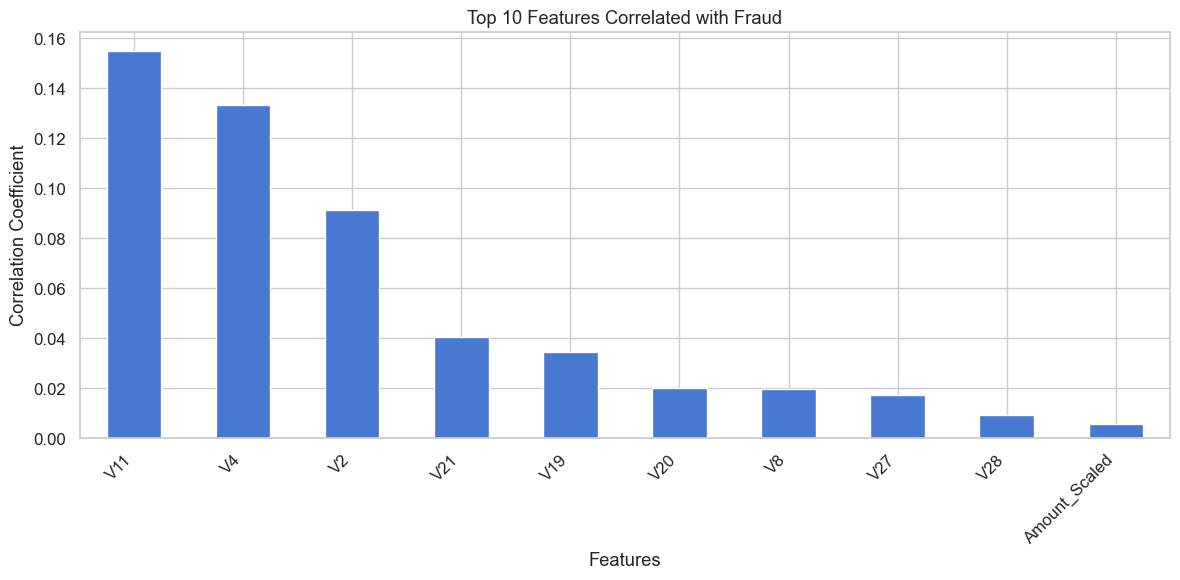


Top 10 Features Most Correlated with V1:
V1             1.000000e+00
Time_Scaled    1.173963e-01
V28            2.083082e-15
V23            6.168652e-16
V20            4.654551e-16
V2             4.135835e-16
V15            3.547782e-16
V11            2.125498e-16
V12            2.053457e-16
V19            1.502024e-16
Name: V1, dtype: float64

Top 10 Features Most Correlated with V2:
V2       1.000000e+00
Class    9.128865e-02
V13      6.295388e-16
V5       5.157519e-16
V1       4.135835e-16
V18      3.284605e-16
V3       3.243764e-16
V6       2.787346e-16
V20      2.506675e-16
V26      2.057310e-16
Name: V2, dtype: float64


In [35]:
# First, let's see what columns we have
print("Available columns in the dataset:")
print(df.columns.tolist())

# Correlation Analysis
plt.figure(figsize=(20, 10))

# Calculate correlation matrix
correlation_matrix = df.corr()

# Create heatmap
sns.heatmap(correlation_matrix, 
            cmap='coolwarm', 
            linewidths=0.5,
            annot=True)

plt.title('Correlation Matrix of Credit Card Fraud Dataset', fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Top correlations with Class
print("\nTop 10 Features Most Correlated with Class:")
class_correlations = correlation_matrix['Class'].sort_values(ascending=False)
print(class_correlations.head(10))

# Visualize top correlations
plt.figure(figsize=(12, 6))
class_correlations.drop('Class').head(10).plot(kind='bar')
plt.title('Top 10 Features Correlated with Fraud')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print correlations with V1-V28 features
print("\nTop 10 Features Most Correlated with V1:")
print(correlation_matrix['V1'].sort_values(ascending=False).head(10))

print("\nTop 10 Features Most Correlated with V2:")
print(correlation_matrix['V2'].sort_values(ascending=False).head(10))


In [36]:
# Train and save model for live prediction
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Prepare data
X = df.drop('Class', axis=1)
y = df['Class']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
print("Training model...")
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1,
    class_weight='balanced'
)
model.fit(X_train_scaled, y_train)

# Evaluate model
y_pred = model.predict(X_test_scaled)
print("\nModel Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Save model and scaler
print("\nSaving model and scaler...")
with open('credit_fraud.pkl', 'wb') as f:
    pickle.dump({
        'model': model,
        'scaler': scaler,
        'feature_names': X.columns.tolist()
    }, f)
print("Model saved as 'credit_fraud.pkl'")

# Test prediction function
def predict_fraud(transaction_data):
    """
    Predict if a transaction is fraudulent
    
    Parameters:
    transaction_data: dict or DataFrame with transaction features
    
    Returns:
    prediction: 0 (legitimate) or 1 (fraudulent)
    probability: probability of fraud
    """
    # Load model and scaler
    with open('credit_fraud.pkl', 'rb') as f:
        saved_data = pickle.load(f)
        model = saved_data['model']
        scaler = saved_data['scaler']
        feature_names = saved_data['feature_names']
    
    # Convert input to DataFrame if it's a dict
    if isinstance(transaction_data, dict):
        transaction_data = pd.DataFrame([transaction_data])
    
    # Ensure all required features are present
    for feature in feature_names:
        if feature not in transaction_data.columns:
            transaction_data[feature] = 0
    
    # Reorder columns to match training data
    transaction_data = transaction_data[feature_names]
    
    # Scale features
    transaction_scaled = scaler.transform(transaction_data)
    
    # Make prediction
    prediction = model.predict(transaction_scaled)[0]
    probability = model.predict_proba(transaction_scaled)[0][1]
    
    return prediction, probability

# Example usage
print("\nTesting prediction function with sample transaction...")
sample_transaction = X.iloc[0:1].to_dict('records')[0]
prediction, probability = predict_fraud(sample_transaction)
print(f"Prediction: {'Fraudulent' if prediction == 1 else 'Legitimate'}")
print(f"Probability of fraud: {probability:.2%}")

Training model...

Model Performance:
Accuracy: 0.9993504441557529

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.81      0.82      0.81        98

    accuracy                           1.00     56962
   macro avg       0.90      0.91      0.91     56962
weighted avg       1.00      1.00      1.00     56962


Saving model and scaler...
Model saved as 'credit_fraud.pkl'

Testing prediction function with sample transaction...
Prediction: Legitimate
Probability of fraud: 0.50%


In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import joblib

# Load data
df = pd.read_csv('creditcard.csv')
X = df.drop('Class', axis=1)
y = df['Class']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Train Linear Regression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Save model, scaler, and feature names
joblib.dump({
    'model': model,
    'scaler': scaler,
    'feature_names': list(X.columns)
}, 'credit_fraud.pkl')

print('Linear Regression model trained and saved as credit_fraud.pkl')

Linear Regression model trained and saved as credit_fraud.pkl
